# Give Me Some Credit - PCA/Hyperparameter/CV

## 1. Packages importing and data processing

### Basic packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data processing (Follow the former steps)

In [ ]:
train_dataset = pd.read_csv('cs-training.csv')
train_dataset.head(10)

train_dataset.describe() #There is outliers that age == 0
train_dataset = train_dataset[train_dataset['age'] > 0] #removing the outliers

train_dataset = train_dataset.fillna(train_dataset.mean())#Fill-in the missing values with the column means

#Spilt the features and targets
X_train = train_dataset.iloc[:,2:] 
y_train = train_dataset.iloc[:,1]

#Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

#Loading the features in the test data set
test_dataset = pd.read_csv('cs-test.csv')
test_dataset = test_dataset.fillna(test_dataset.mean()) #Fill-in the missing values with the column means
X_test = test_dataset.iloc[:,2:]
X_test_std = sc.transform(X_test) #Re-use parameters from the training set

#Loading the targets in the test data set
y_test = pd.read_csv('sampleEntry.csv')
y_test['Probability'] = y_test['Probability'].apply(lambda x: 1 if x > 0.5 else 0)
y_to_test = np.array(y_test['Probability'])

## 2. Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.2994888 , 0.15331645, 0.12254484, 0.10092081, 0.10010861,
       0.09344981, 0.07346596, 0.05430292, 0.00172093, 0.00068085])

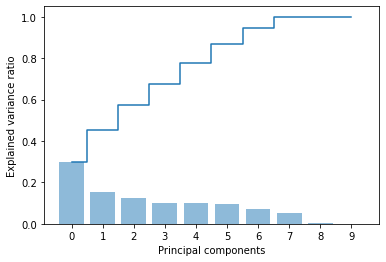

In [ ]:
plt.bar(range(10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(10))
plt.show()

In [ ]:
pca = PCA(n_components=5) #The variance can be explained by the former five factors are above 80%
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## 3. Pipeline Implementation



### Perforamce evaluation model construction

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#Define a function to evaluate and visualize the prediction results of each model
def model_evaluation(model, true, predicted):
    
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = accuracy_score(true, predicted)
    report = classification_report(predicted, true)
    print(model,'\n')
    print('Train set Accuracy: ',round((train_accuracy), 2)*100,'%')
    print('Test set Accuracy: ',round((test_accuracy), 2)*100,'%')
    print('\n--------------------------------------------------\n')
    print('Model Report: \n', report)
    print('--------------------------------------------------\n')
    print('Confusion Matrix: \n')
    cm = metrics.confusion_matrix(true, predicted)
    cm = cm / np.sum(cm, axis = 1)[:,None]
    labels = y_train.unique()
    sns.set(rc={'figure.figsize':[2,2]})
    sns.heatmap(cm, xticklabels = labels,
              yticklabels = labels, 
              annot=True, 
              cmap = 'YlGnBu_r')
    plt.show()
    plt.pause(0.05)

### Logistic Regression

Pipeline(steps=[('pca', PCA(n_components=5)),
                ('logisticregression', LogisticRegression(random_state=1))]) 

Train set Accuracy:  93.0 %
Test set Accuracy:  98.0 %

--------------------------------------------------

Model Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    101285
           1       0.08      0.59      0.13       218

    accuracy                           0.98    101503
   macro avg       0.54      0.79      0.56    101503
weighted avg       1.00      0.98      0.99    101503

--------------------------------------------------

Confusion Matrix: 



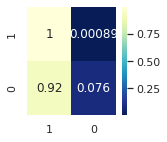

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(PCA(n_components=5),
                        LogisticRegression(random_state=1, solver='lbfgs')))

pipe_lr.fit(X_train_std,y_train)
lr_predict = pipe_lr.predict(X_test_std)
model_evaluation(pipe_lr, y_to_test, lr_predict)

### Support Vector Machine

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('pca', PCA(n_components=5)),
                ('svc', SVC(max_iter=10000, random_state=1))]) 

Train set Accuracy:  94.0 %
Test set Accuracy:  99.0 %

--------------------------------------------------

Model Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    100079
           1       0.59      0.71      0.65      1424

    accuracy                           0.99    101503
   macro avg       0.80      0.85      0.82    101503
weighted avg       0.99      0.99      0.99    101503

--------------------------------------------------

Confusion Matrix: 



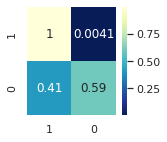

In [ ]:
from sklearn.svm import SVC

pipe_svm = make_pipeline(PCA(n_components=5),
                         SVC(kernel='rbf', random_state=1, max_iter=10000))
pipe_svm.fit(X_train_std,y_train)
svm_predict = pipe_svm.predict(X_test_std)
model_evaluation(pipe_svm, y_to_test, svm_predict)

### Random Forest

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pipeline(steps=[('pca', PCA(n_components=5)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, random_state=1))]) 

Train set Accuracy:  93.0 %
Test set Accuracy:  98.0 %

--------------------------------------------------

Model Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    101503
           1       0.00      0.00      0.00         0

    accuracy                           0.98    101503
   macro avg       0.50      0.49      0.50    101503
weighted avg       1.00      0.98      0.99    101503

--------------------------------------------------

Confusion Matrix: 



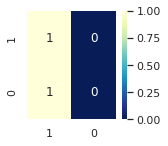

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(PCA(n_components=5),
                         RandomForestClassifier(max_depth=3, random_state=1))
pipe_rf.fit(X_train_std,y_train)
rf_predict = pipe_rf.predict(X_test_std)
model_evaluation(pipe_rf, y_to_test, rf_predict)

## 4. Grid Search

### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = {'logisticregression__C': param_range}

grid_lr = GridSearchCV(estimator=pipe_lr,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)
grid_lr.fit(X_train_std, y_train)
scores = cross_val_score(pipe_lr, X_train_std, y_train, 
                         scoring='accuracy', error_score='raise', cv=5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

print('The best performance are：%0.3f' % grid_lr.best_score_)

best_parameters = grid_lr.best_estimator_.get_params()
print('The best hyperparamet：\n', best_parameters)

CV accuracy: 0.933 +/- 0.000
The best performance are：0.933
The best hyperparamet：
 {'memory': None, 'steps': [('pca', PCA(n_components=5)), ('logisticregression', LogisticRegression(C=0.0001, random_state=1))], 'verbose': False, 'pca': PCA(n_components=5), 'logisticregression': LogisticRegression(C=0.0001, random_state=1), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'logisticregression__C': 0.0001, 'logisticregression__class_weight': None, 'logisticregression__dual': False, 'logisticregression__fit_intercept': True, 'logisticregression__intercept_scaling': 1, 'logisticregression__l1_ratio': None, 'logisticregression__max_iter': 100, 'logisticregression__multi_class': 'auto', 'logisticregression__n_jobs': None, 'logisticregression__penalty': 'l2', 'logisticregression__random_state': 1, 'logisticre

In [ ]:
param_range = [ 0.001, 0.01, 0.1]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

grid_svm = GridSearchCV(estimator=pipe_svm,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)
grid_svm.fit(X_train_std, y_train)
scores = cross_val_score(pipe_svm, X_train_std, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

print('The best performance are：%0.3f' % grid_svm.best_score_)

best_parameters = grid_svm.best_estimator_.get_params()
print('The best hyperparamet：\n', best_parameters)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider

CV accuracy: 0.934 +/- 0.000
The best performance are：0.933
The best hyperparamet：
 {'memory': None, 'steps': [('pca', PCA(n_components=5)), ('svc', SVC(C=0.1, kernel='linear', max_iter=10000, random_state=1))], 'verbose': False, 'pca': PCA(n_components=5), 'svc': SVC(C=0.1, kernel='linear', max_iter=10000, random_state=1), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'svc__C': 0.1, 'svc__break_ties': False, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 10000, 'svc__probability': False, 'svc__random_state': 1, 'svc__shrinking': True, 'svc__tol': 0.001, 'svc__verbose': False}


### Random Forest

In [ ]:
param_grid = {'randomforestclassifier__max_depth': [20,30,40,100,110]}

grid_rf = GridSearchCV(estimator=pipe_rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

grid_rf.fit(X_train_std, y_train)

scores = cross_val_score(pipe_rf, X_train_std, y_train, 
                         scoring='accuracy', cv=5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

print('The best performance are：%0.3f' % grid_rf.best_score_)

best_parameters = grid_rf.best_estimator_.get_params()
print('The best hyperparameters：\n', best_parameters)

CV accuracy: 0.933 +/- 0.000
The best performance are：0.933
The best hyperparameters：
 {'memory': None, 'steps': [('pca', PCA(n_components=5)), ('randomforestclassifier', RandomForestClassifier(max_depth=20, random_state=1))], 'verbose': False, 'pca': PCA(n_components=5), 'randomforestclassifier': RandomForestClassifier(max_depth=20, random_state=1), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'randomforestclassifier__bootstrap': True, 'randomforestclassifier__ccp_alpha': 0.0, 'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_leaf_nodes': None, 'randomforestclassifier__max_samples': None, 'randomforestclassifier__min_impurity_decrease': 0.0,